<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2025/blob/main/Lections/L07_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения

### Лекция 7. Бинарные деревья решений.

#### Решающие деревья. Категориальные признаки и работа с ними. Случайный лес.

## Деревья решений

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/dtree.png" alt="Drawing" width= "900px;"/>


Деревья решений — это одна из первых моделей машинного обучения, которая была известна человеку. Изначально их строили без специальных алгоритмов, а просто вручную.

Когда требовалось принять решение по проблеме, для которой построено дерево, человек брал исследуемый объект и "проходил" по этому дереву на освновании признаков объекта.



Как оно устроено? В каждом узле есть какой-то вопрос.

Например, так устроены дихотомические определители ("ключи") в биологии (и еще много где):

Начав с "корневого" узла, мы последовательно перемещаемся в сторону "листьев", на каждом узле встречая некий вопрос качательно нашего исследуемого объекта, и в зависимости от ответа переходим на тот или иной новый узел.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/ants.png" alt="Drawing" width= "800px;"/>





Понятно, что вручную такие деревья строить тяжело, для большого объема данных их руками и не построишь.
Также возникает вопрос: зачем вообще нужна такая старая модель?

Оказывается, что эти модели могут быть неожиданно эффективны и их можно автоматически строить с помощью специально разработанных алгоритмов. Причем, это можно делать достаточно быстро даже на больших объемах данных.  

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/goldbloom.png" alt="Drawing" width= "650px;"/>

По словам Энтони Голдблума, одного из наиболее известных участников kaggle, на соревнованиях побеждают hand-crafted алгоритмы и нейронные сети. Под **hand-crafted** Энтони понимает алгоритмы, основанные на деревьях решений.



До недавнего времени модели, основанные на деревьях решений побеждали практически везде — в рекомендательных системах, в задачах ранжирования, задачах релевантной выдачи для поиска, на предсказаниях, какую рекламу выберет пользователь и так далее.  В любой задаче, где нет какой-то локальный связанности - которая есть в изображениях, текстах и других областях, захваченных нейронными сетями.

Другими словами, в задачах, где ваши данные имеют **табличный** формат (то есть каждый признак никак не связан с другими и порядок расположения признаков таблице не имеет никакого значения) вполне можно получить если не преимущество над нейросетевым решением, то как минимум сходное по качеству решение при помощи как раз древесных моделей. Вместе с этим они гораздо быстрее обучаются и настраиваются, имеют меньше парамеров (= меньше переобучаются) и позволяют получить прикидочное baseline решение буквально при запуске "из коробки".

## Принцип работы дерева решений<a class="anchor" style="autocontent" id="Принцип-работы-дерева-решений"/><br>


Принцип работы дерева решений можно легко проиллюстрировать на примере известного датасета Iris. Допустим, мы хотим предсказать класс по всего двум признакам (в данном случае $-$ вещественным). Для каждой точки (объекта) мы можем задать вопрос по каждому из признаков: например, вопрос "petal length меньше 2.4?" сразу отделит объекты  setosa от остальных; две другие группы разделяются последовательными вопросами сначала по второй оси координат, потом снова по первой.

Фактически, дерево решений бьет пространство признаков с помощью плоскостей на области, и в каждой из этих областей предсказывается какая-то константная величина или класс.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/plain_split.png" alt="Drawing" width= "650px;"/>

Деревья решений $-$ очень мощный метод.

Аналог [теоремы об универсальном аппроксиматоре](https://en.wikipedia.org/wiki/Universal_approximation_theorem) для деревьев утверждает, что дерево решений способно аппроксимировать любую заранее заданную кусочно-постоянную функцию.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/hyperplanes.jpg" alt="Drawing" width= "600px;"/>

Выгодным отличием от нейронных сетей является то, что дерево может работать на выборке любого размера, даже самой малой, и делить листья новыми правилами может до тех пор, пока в каждом листе не останется по одному объекту. Это, конечно же, приведет к сильному переобучению, однако в идеале при наличии всей генеральной совокупности дерево решений способно выучить её "идеально".

## Деревья решений $-$ классификация<a class="anchor" style="autocontent" id="Деревья-решений-классификация"/><br>
Деревья решений как правило используются при решении 2-х типов задач — классификации и регрессии.
Первая — классификация.

Хотим для каждого объекта предсказываеть его класс. Но помним, что часто границы классов могут быть плохо разделимы $-$ хотим предсказывать не "жесткое" значение, а *вероятность* принадлежности к тому или иному классу, то не одно число, а вектор фиксированного размера. Такие модели куда более актуальны.

Как же дейстовать?

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/leaf.png" alt="Drawing" width= "700px;"/>

В данной области пространства признаков, отделяющей конкретный лист дерева, могут быть объекты разных классов. Мы видим только те, которые были в обучающей выборке, и по ним можем составить статистику: оцениваем вероятность конкретного класса в текущем листе как число представителей данного класса деленное на общее число объектов в клетке.

Оценив долю объектов нужного класса, попадающих в данный узел, мы делаем догадку о состоянии генеральной совокупности.

Оценка доли объектов классов в популяции:
$$\hat{p} = \dfrac n N$$

Эта оценка имеет дисперсию $-$ величину, характеризующую то, насколько сильно мы можем ошибиться с оценкой доли.

$$D(\hat{p}) = \dfrac {p \cdot (1 - p)} {N}$$

Это сразу дает нам одну важную догадку - желательно, чтобы в листе дерева было не очень мало объектов. Чем объектов меньше - тем больше дисперсия и больше возможная ошибка.

## Как построить дерево решений?<a class="anchor" style="autocontent" id="Как-построить-дерево-решений?"/><br>

### Бинарные признаки<a class="anchor" style="autocontent" id="Бинарные признаки"/><br>

Начнем с простого. Например, вспомним про вопросы в определители. Каждому из признаков объекта можно задать вопрос, "ответом" на который будет "да" или "нет". Казалось бы, все признаки равноправны, и начинать строить дерево мы можем с любого. Нужно как-то оценить, какие вопросы поместить в узлы "выше" других на дереве.



Посмотрим на такой набор данных: будем предсказывать, есть ли у человека инфаркт или нет. Можем перебрать все три признака и посмотреть, насколько хорошо они разделяют целевую переменную.
<br><br>

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/binary_feat_new.png" alt="Drawing" width= "900px;"/>

Источник: <a href="https://www.youtube.com/watch?v=7VeUPuFGJHk">StatQuest</a>

Логичнее всего будет выбрать в качестве лучшего дерева то, которое дает лучшее разбиение. Существуют различные оценки, например, прямое вычисление ошибки классификации как доли неправильно классфицированных объектов, индекс Gini  или кросс-энтропия.

При построении деревьев чаще всего используется **индекс Gini**: математическое ожидание ошибки классификации, если мы относим объект к классу с вероятностью, равной вероятности этого класса.
Иначе - если мы возьмем два объекта из данного листа, какова вероятность, что они будут принадлежать к **разным** классам




$$Gini = \sum_i p_i (1 - p_i)  = 1 - \sum_ip_i^2$$




Можно посчитать Gini index для каждого листа, затем для каждого разбиваемого узла. После этого можно будет оценить **impurity decrease** $-$ насколько стал лучше результат после разбиения по этому признаку.

$$impurity\_decrease = Gini_0 - (\frac{n_1}{n_1+n_2}Gini_1 + \frac{n_2}{n_1+n_2}Gini_2)$$

1, 2 $-$ индексы листьев, 0 $-$ индекс разбиваемого узла.

<br>

$$p = \frac{105+33}{105+33+34+125} = 0.88$$

<br>

$$Gini_0 = 0.498$$


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/impurity_new.png" alt="Drawing" width= "900px;"/>



Разбиение по признаку "Боль в груди" приводит в наилучшему снижению impurity. Его выбираем в качестве узлового признака. Но у нас осталось два других, мы можем продолжить разбивать по ним. Для каждого из полученных в корневом узле разбиений выборки действуем точно также:

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/gini_new.png" alt="Drawing" width= "900px;"/>

В результате, итеративно добавляя признаки, получим итоговое дерево.

Может получиться так, что на каком-то этапе разбиение приведет к **ухудшению** impurity.

В таком случае есть две стратегии:
* Early stopping. Можем остановиться на этом узле, сделать его листом, ничего больше не делать. Можно даже при построении указывать порог impurity, ниже которого прекращаем разбивать узел.

* Продолжаем делить узел, надеясь, что следующие разбиения будут лучше.

Early stopping не всегда бывает полезен. Например, для разделения классов требуются две прямые, а проведение одной прямой качество разбиения никак не улучшает, а, возможно, что и ухудшает.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/early_stopping.png" alt="Drawing" width= "450px;"/>

### Вещественные признаки<a class="anchor" style="autocontent" id="Вещественные признаки"/><br>

Как поступать с вещественными признаками?

Отсортировав объекты по значению признака, после этого для каждого возможного порога можем сделать разбиение и выбираем лучший порог точно так же, как это делалось с бинарными признаками, по impurity_decrease. После этого из всех вещественных признаков выбираем лучший.

### Категориальные признаки<a class="anchor" style="autocontent" id="Категориальные признаки"/><br>



Помимо вещественных и бинарных признаков бывают и категориальные $-$ признак может принимать несколько значений. Деревья решений в принципе способны работать с классами, закодированными напрямую (от 0 до n_classes-1): такая процедура называется **label encoding**, однако другие модели будут воспринимать такую кодировку ошибочно: мы не хотим, чтобы модель решила, что, например, красный цвет "больше" зеленого, поэтому разные категории необходимо специльным образом обрабатывать перед подачей. Например, превратить каждую категорию в псевдо-бинарный признак. Такая процедура называется **one-hot encoding**:

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/onehot.png" alt="Drawing" width= "450px;"/>

Стоит, однако, отметить, что при большом количестве категорий такая операция сильно раздувает датасет.

Некоторые линейные модели могут плохо работать с идеально коллинеарными признаками. В таком случае делают кодирование исходного признака с N значениями не на N, а на N-1 новых признаков.


Деревья решений умеют подбирать лучшее разбиение на категориальных признаках несколькими способами оптимальнее полного перебора.

#### Кодирование биологических последовательностей<a class="anchor" style="autocontent" id="Кодирование биологических последовательностей"/><br>

Кодирование биологических последовательностей (как и любых других) не сильно отличается от работы с другими категориальными признаками.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/onehot_dna.png" alt="Drawing" width= "450px;"/>

## Деревья решений $-$ регрессия <a class="anchor" style="autocontent" id="Деревья решений - регрессия"/><br>


В случае деревьев задача регрессии очень похожа на классификацию. Каждый лист отделяет некую область в пространстве признаков, и нам надо предсказать в этой области некое константное значение, только на этот раз это не класс, а собственно значение целевой переменной. Но объекты, лежащие в каждом листе, могут иметь варьирующие значения. Как нам охарактеризовать каждый лист одним значением?

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/regression.png" alt="Drawing" width= "800px;"/>

Источник: <a href="https://en.m.wikipedia.org/wiki/File:Visualisation_mode_median_mean.svg">Wikimedia Commons</a>


Выборку можно охарактеризовать разными значениями, но проще всего предсказывают именно среднее. Как и раньше, оцениваем среднее по листу по тренировочной выборке:

$$\overline{x} = \dfrac {\sum_i X_i} {n}$$

При этом наша оценка имеет дисперсию, которая показывает, насколько сильно мы можем ошибиться

$$D(\overline{x}) = \dfrac {\sigma^2} {n} $$

И мы опять приходим к тому, что желательно иметь в каждом листе достаточное число объектов, чтобы дисперсия оценки была меньше.

В качестве критерия качества Gini уже не подойдет. Мы хотим, чтобы в листе объекты в целом отличались от предсказываемого значения как можно меньше $-$  то есть будем минимизировать отклонение. Можно использовать MAE, но чаще все же берут MSE.

$$MSE = \frac{1}{n} \sum_i(X_i - \overline X_i)^2 = \frac{n}{n-1}D(X)$$



Получается, что задача сводится к минимизации дисперсии выборки, но при этом надо взвешивать на размер каждого разбиения, иначе самыми выгодными будут узлы из одного объекта, а это нехорошо.

$$\frac{D_{R_1} \times N_1 + D_{R_2} \times N_2} {N_1 + N_2} < D_{R_0}$$

Подробнее на [StatQuest](https://www.youtube.com/watch?v=g9c66TUylZ4).

## Деревья решений и работа с пропущенными значениями<a class="anchor" style="autocontent" id="Деревья-решений-и-работа-с-пропущенными-значениями"/><br>

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/missing.png" alt="Drawing" width= "400px;"/>

Данные очень часто могут содержать пропущенные значений. Алгоритмы машинного обучения (особенно непрерывные модели, такие как нейронные сети) плохо реагируют на пропуски в данных, поэтому с ними надо что-то делать.

Обучно над всеми значениями признаков машина проводит некие математические операции, поэтому просто оставить NaN в данных нельзя $-$ из-за этого формулы сойдут с ума.
Есть два основных способа борьбы с пропусками:

* Удалять содержащие пропуски участки даных;
* Заполнять пропуски какими-то значениями.

Проще всего удалить объекты, содержащие пропуски в данных. Однако в науке (особенно в биологии) часто так сделать нельзя, потому что данные стоят дорого, а на малой выборке мы плохо выучим генеральную совокупность. Если много объектов содержат пропуски в каком-то одном признаке, то имеет смысл удалить именно этот признак, однако опять же терять много данных мы не можем себе позволить

* Можно заполнить пропуски каким-то определенным значением. Например, средним или медианой для данного признака. Это может хорошо сработать, но влияет на дисперсию данных и может вносить ошибки.

* Можно поступать сложнее: ввести дополнительнную модель, предсказывающую пропущенные значения. Но если предсказывать значения надо во многих признаков, то потребуется много моделей, каждая будет вносить свой bias, в итоге получим очень зашумленный датасет.

* Также можно использовать алгоритм, который умеет справляться с пропущенными значениями, например, KNN: на место пропущенных значений будут автоматически ставиться средние значения по данному признаку у ближайших соседей объекта.

* Наконец, деревья решений способны работать с пропусками напрямую: достаточно выделить их в отдельную категорию, и дерево просто будет выделять такие объекты в отдельную группу. Это уменьшает дисперсию данных, однако внесение большого числа новых категорий может повлиять на работу модели.

## Неустойчивость деревьев решений<a class="anchor" style="autocontent" id="Неустойчивость-деревьев-решений"/><br>



Деревья решений не используется в чистом виде, потому что они неустойчивы. Если у нас есть данные, и мы выкинем из данных 2 объекта, то дерево решений может очень сильно поменяться. Красивого дерева, как на примере в самом начале, у нас не получится. Будет мешанина, которая может в любой момент поменяться, если мы выкинем пару объектов.

Это слабость древесных моделей, однако, как мы увидим в дальнейшем, одновременно и источник их силы.



In [ ]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

Продемонстриуем неустойчивость решения, получаемого при помощи деревьев решений на примере уже упоминавшегося датасета iris ([ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)).

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor)

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

In [ ]:
data = load_iris()

Будем учиться отделять Ирис виргинаский (versicolor) от остальных видов.

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target != 1 # 0 for setosa, 1 - versicolor, 2 - virginica

Сделаем два разных разбиения наших данных на обучение и тест. И посмотрим, будут ли отличаться деревья, построенные для данных разбиений.

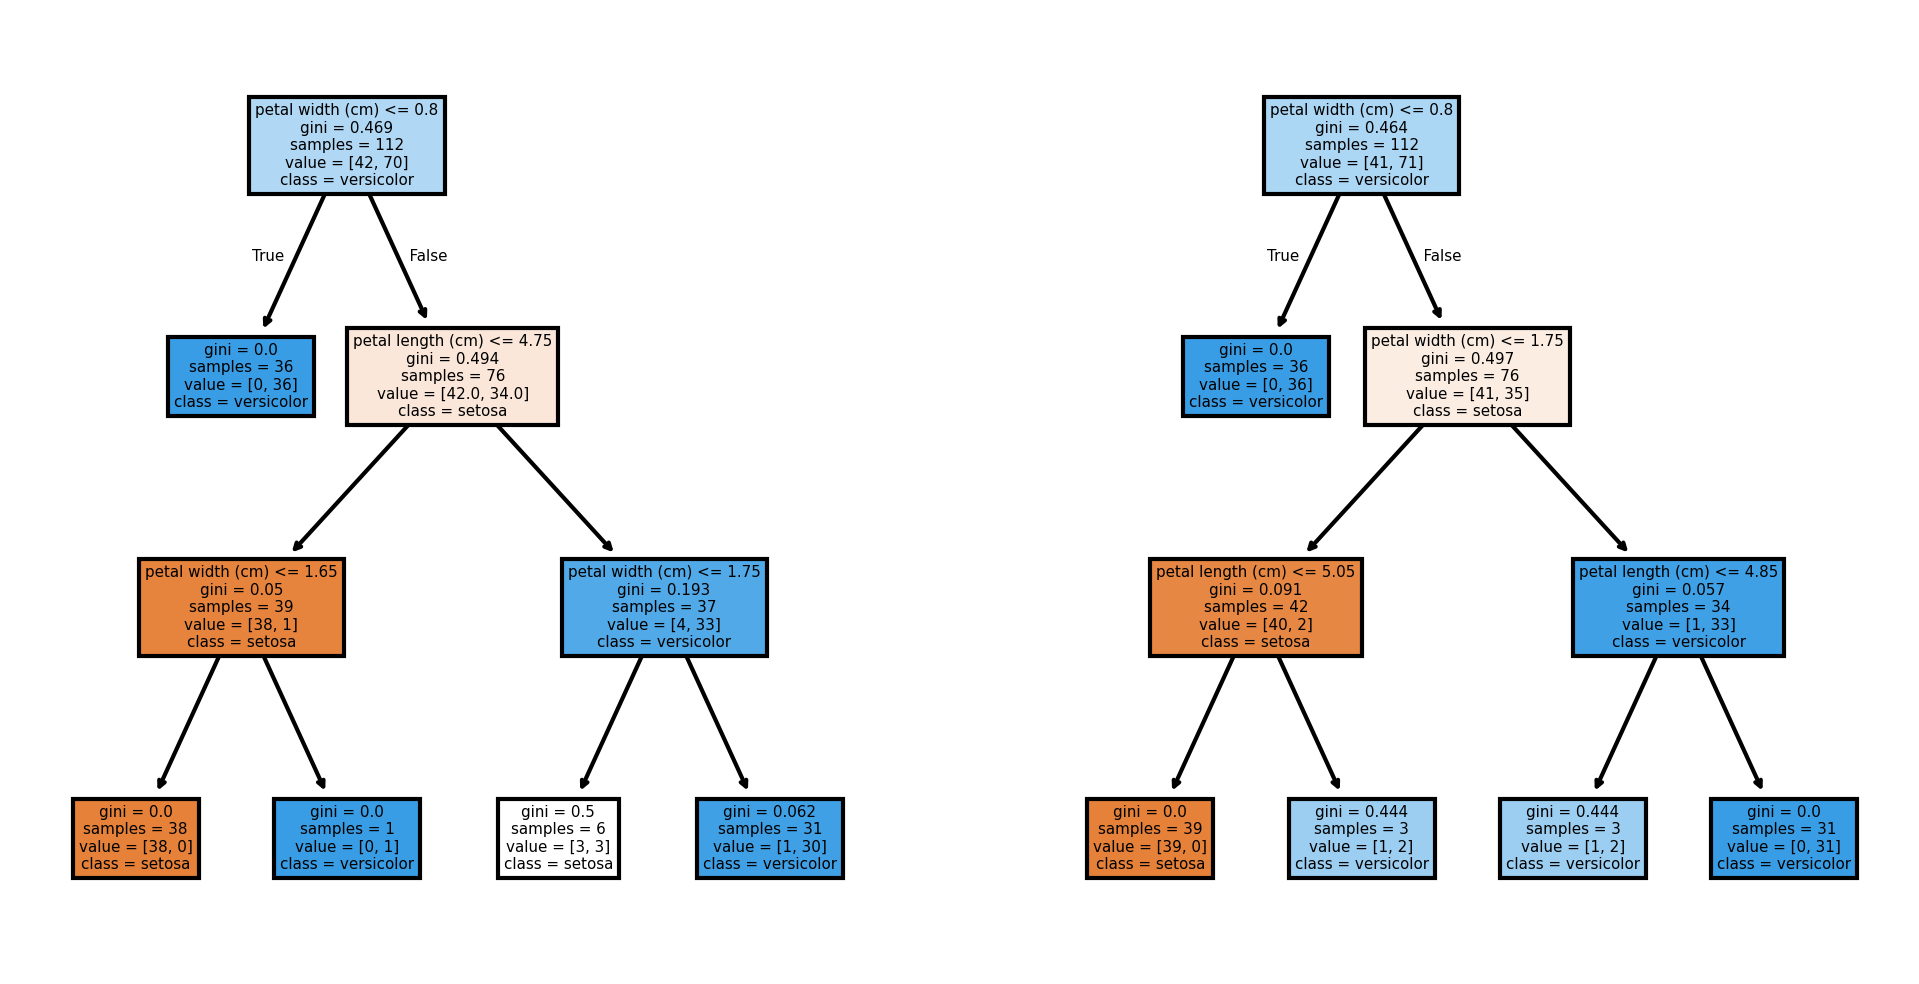

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df[data.feature_names], df['target'], random_state=777)
clf1 = DecisionTreeClassifier(max_depth = 3)
clf1.fit(X_train1, Y_train1)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df[data.feature_names], df['target'], random_state=555)
clf2 = DecisionTreeClassifier(max_depth = 3)
clf2.fit(X_train2, Y_train2)


fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4), dpi=300)
tree.plot_tree(clf1,
               feature_names = fn,
               class_names=cn,
               filled = True, ax=axes[0])
tree.plot_tree(clf2,
               feature_names = fn,
               class_names=cn,
               filled = True, ax=axes[1])
plt.show();

Видим, что даже деревья максимальной глубины 3 уже не совпадают между собой. Конечно, у нас маленький датасет - как правило, чем датасет больше, чем устойчивее будет получаться дерево на первых уроввнях. Но часто и деревья используют куда большей глубины.

Если использовать деревья бОльшей глубины, то и структура деревьев (то, как они выглядят даже если не обращать внимания на конкретные признаки в узлах), будет отличаться

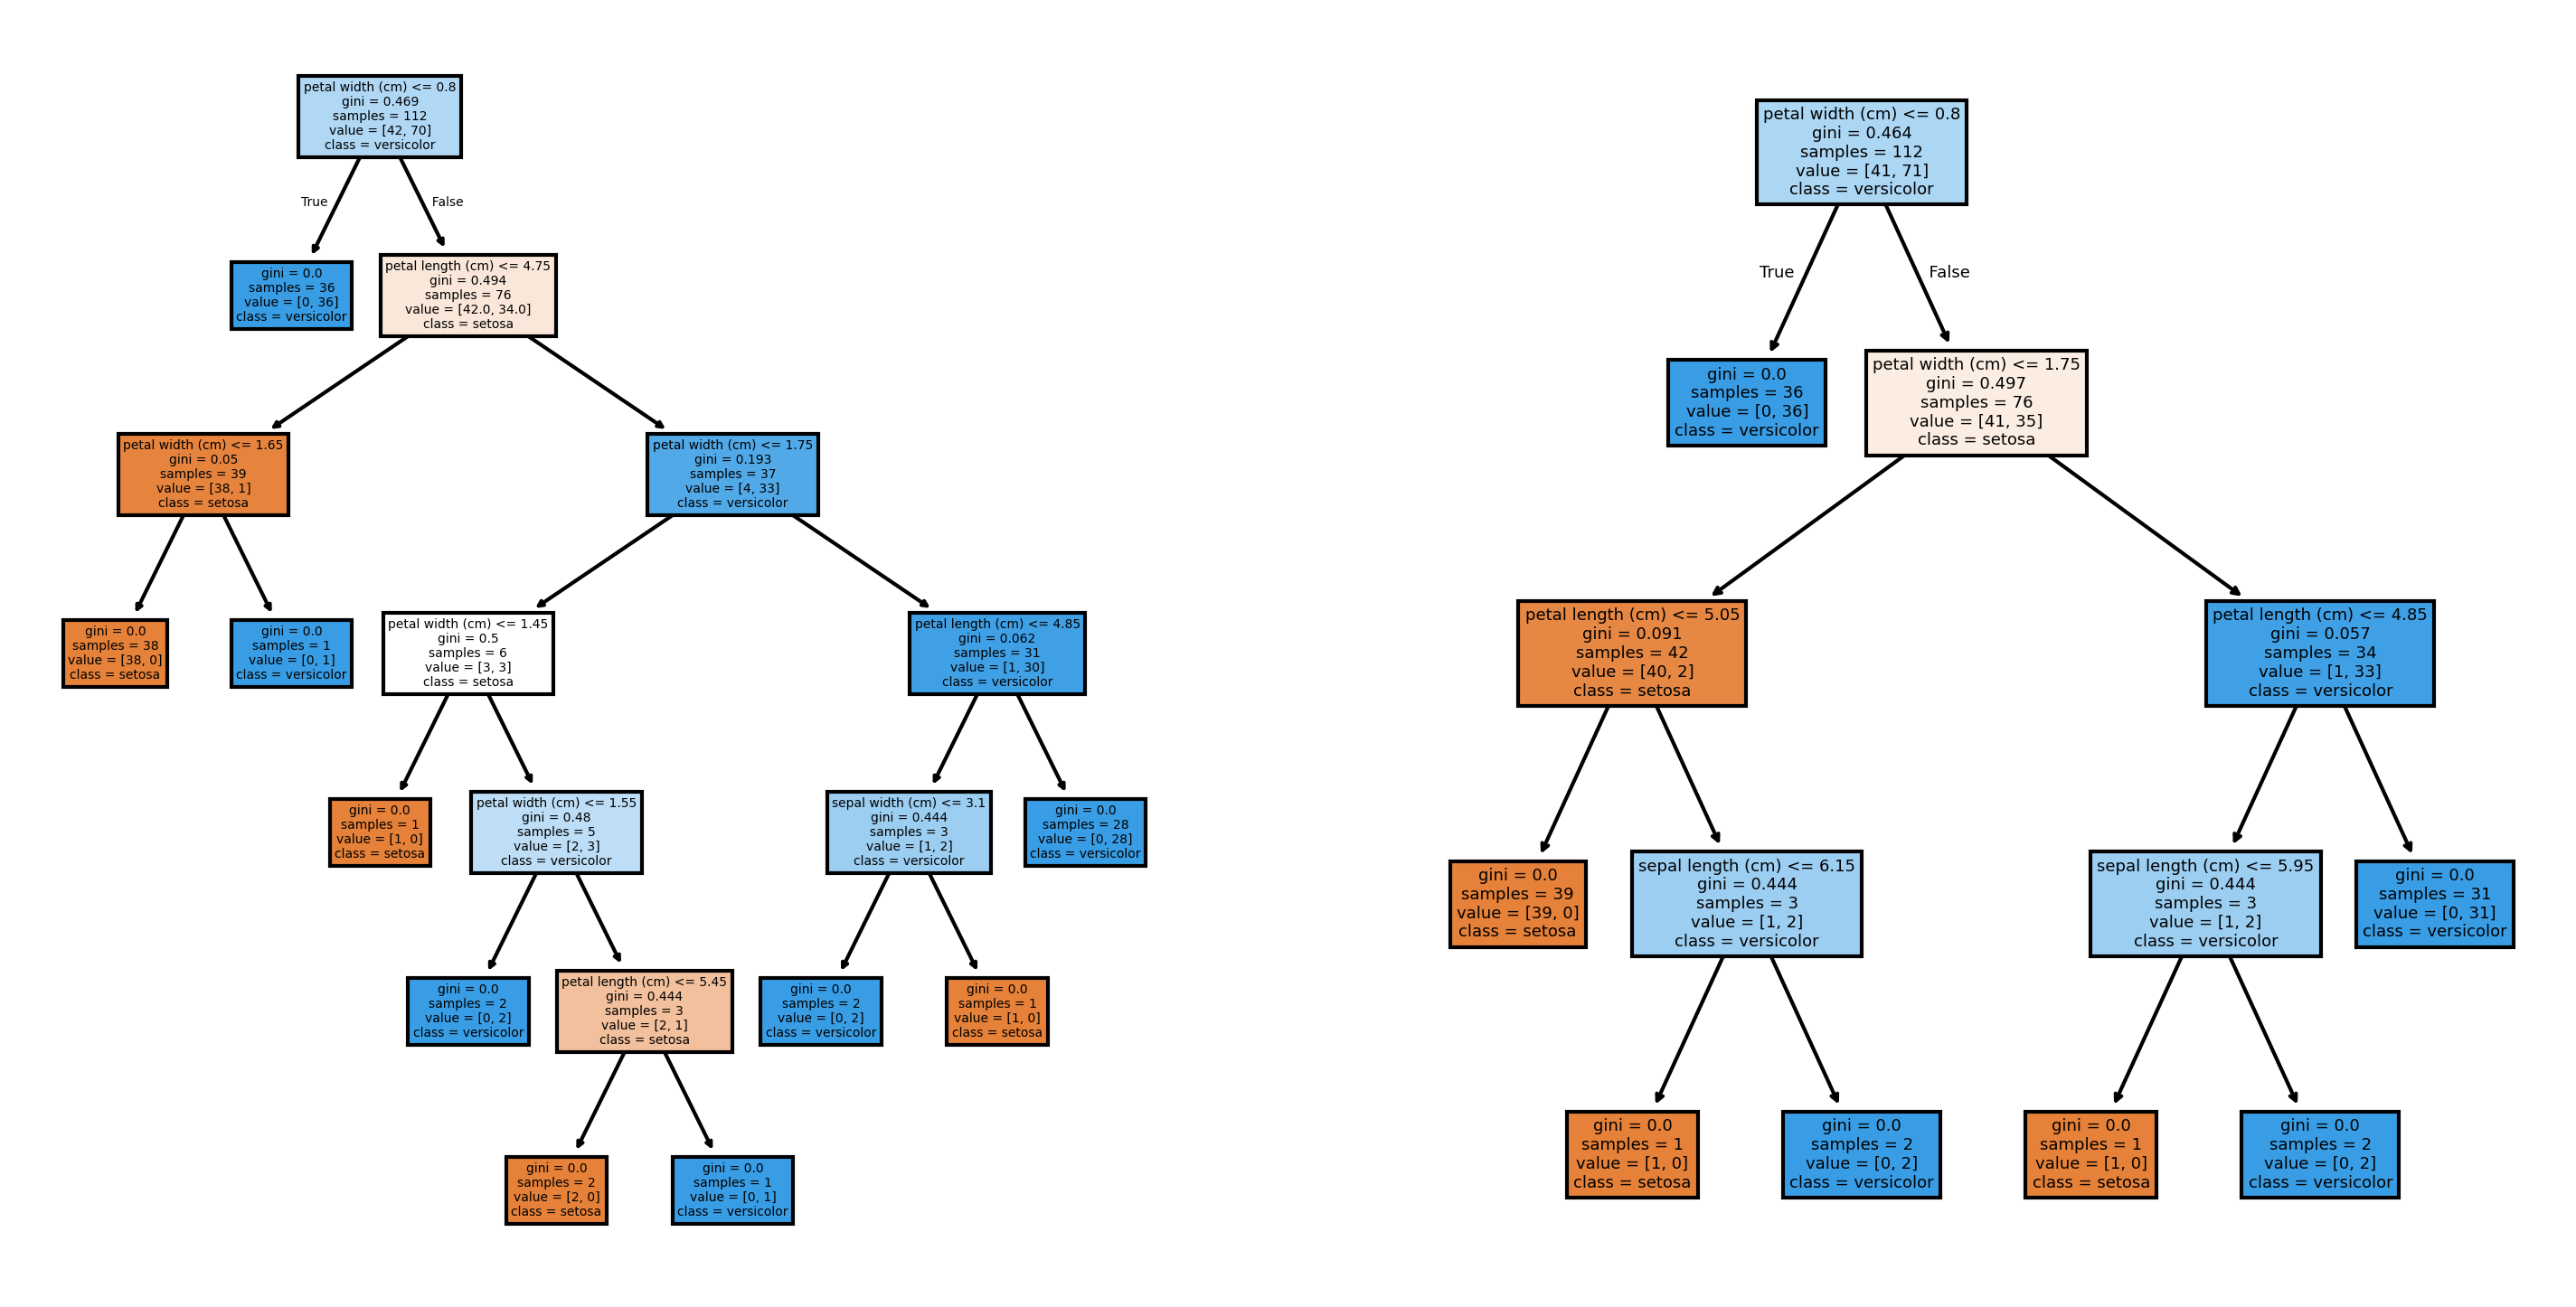

In [ ]:
clf1 = DecisionTreeClassifier(max_depth=10,
                             random_state=0)
clf1.fit(X_train1, Y_train1)

clf2 = DecisionTreeClassifier(max_depth=10,
                             random_state=0)
clf2.fit(X_train2, Y_train2)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=300)
tree.plot_tree(clf1,
               feature_names = fn,
               class_names=cn,
               filled = True, ax=axes[0])
tree.plot_tree(clf2,
               feature_names = fn,
               class_names=cn,
               filled = True, ax=axes[1])
plt.show()

## Переобучение деревьев<a class="anchor" style="autocontent" id="Переобучение-деревьев"/><br>

Если алгоритм при небольшом изменении данных сильно меняет свое решение, это, как правило, указывает на переобучение.

Покажем это на искусственном примере: попробуем разделить искустввенный датасет [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

Источник: [handson-ml](https://github.com/ageron/handson-ml)




In [ ]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    from matplotlib.colors import ListedColormap
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#f7e2eb','#6ab5a6','#e0eaf4'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#f7e2eb','#4c4c7f','#e0eaf4'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", c="#0795ff", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [ ]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)

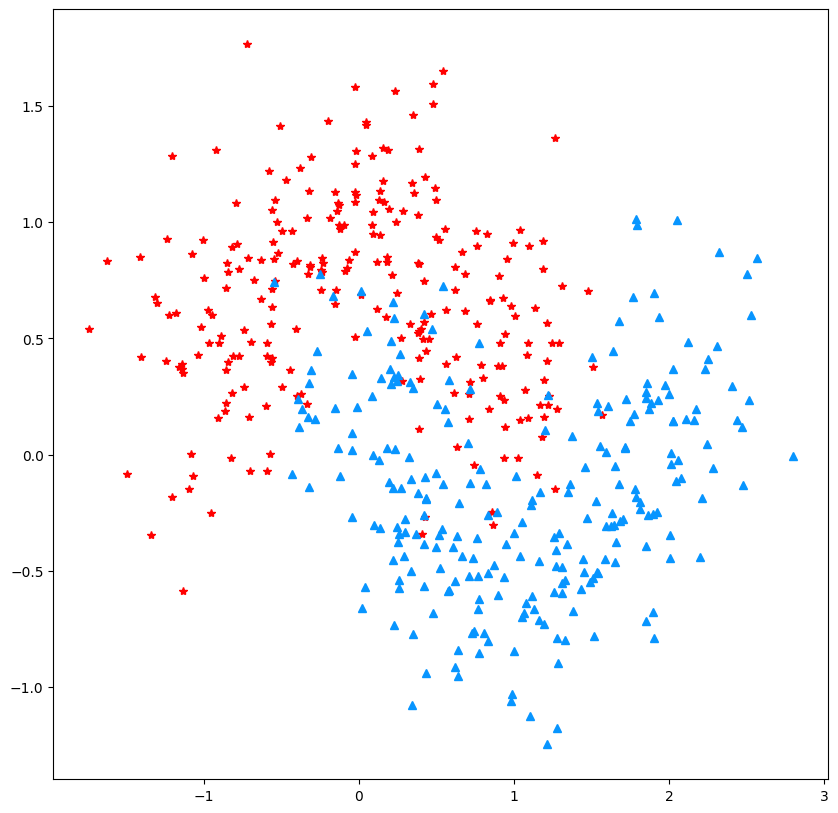

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", c="#0795ff")
plt.show()

Объекты двух пересекающихся классов. Посмотрим, насколько хорошо дерево сможет провести разделяющую гиперплоскость. Зададим дерево большой глубины, например, 20:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

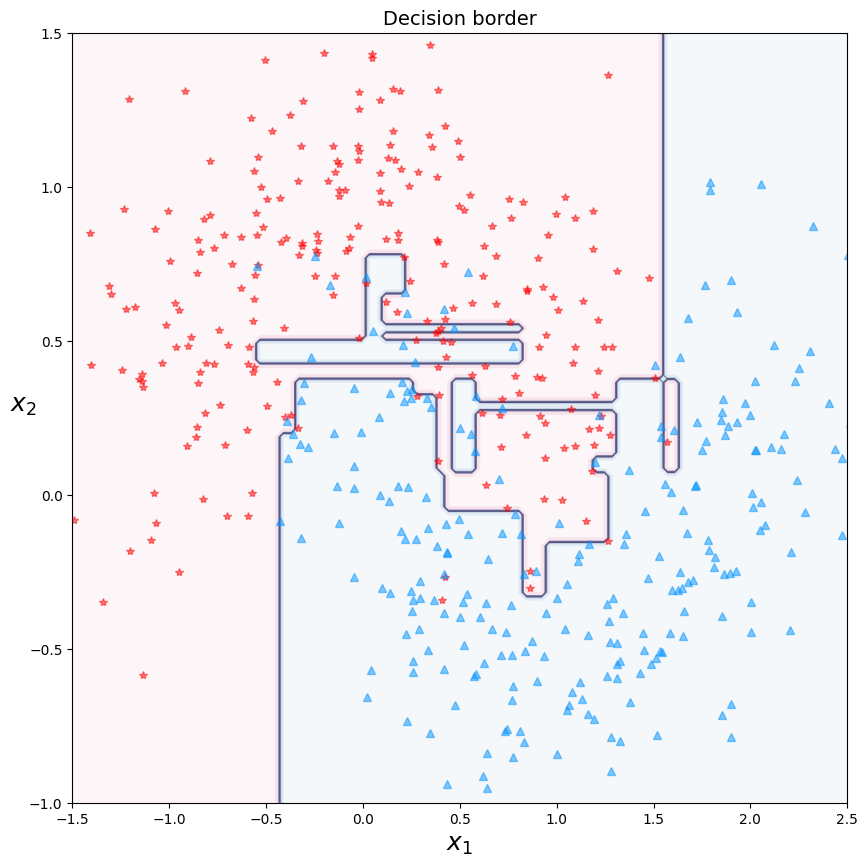

In [ ]:
plt.figure(figsize=(10,10))
clf = DecisionTreeClassifier(max_depth = 20,
                             random_state = 0)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Decision border", fontsize=14)
plt.show()

Основные массы кластеров были разделены правильно, но на границе возникла странные рваные области: дерево пыталось провести больше границ и разделить как можно больше объектов разных классов.

Но является ли полученное разделение "правильным"?


Посмотрим, насколько хорошо сохраняется картина разделения если мы поделим объекты на тренировочную и тестовую выборки по-другому:

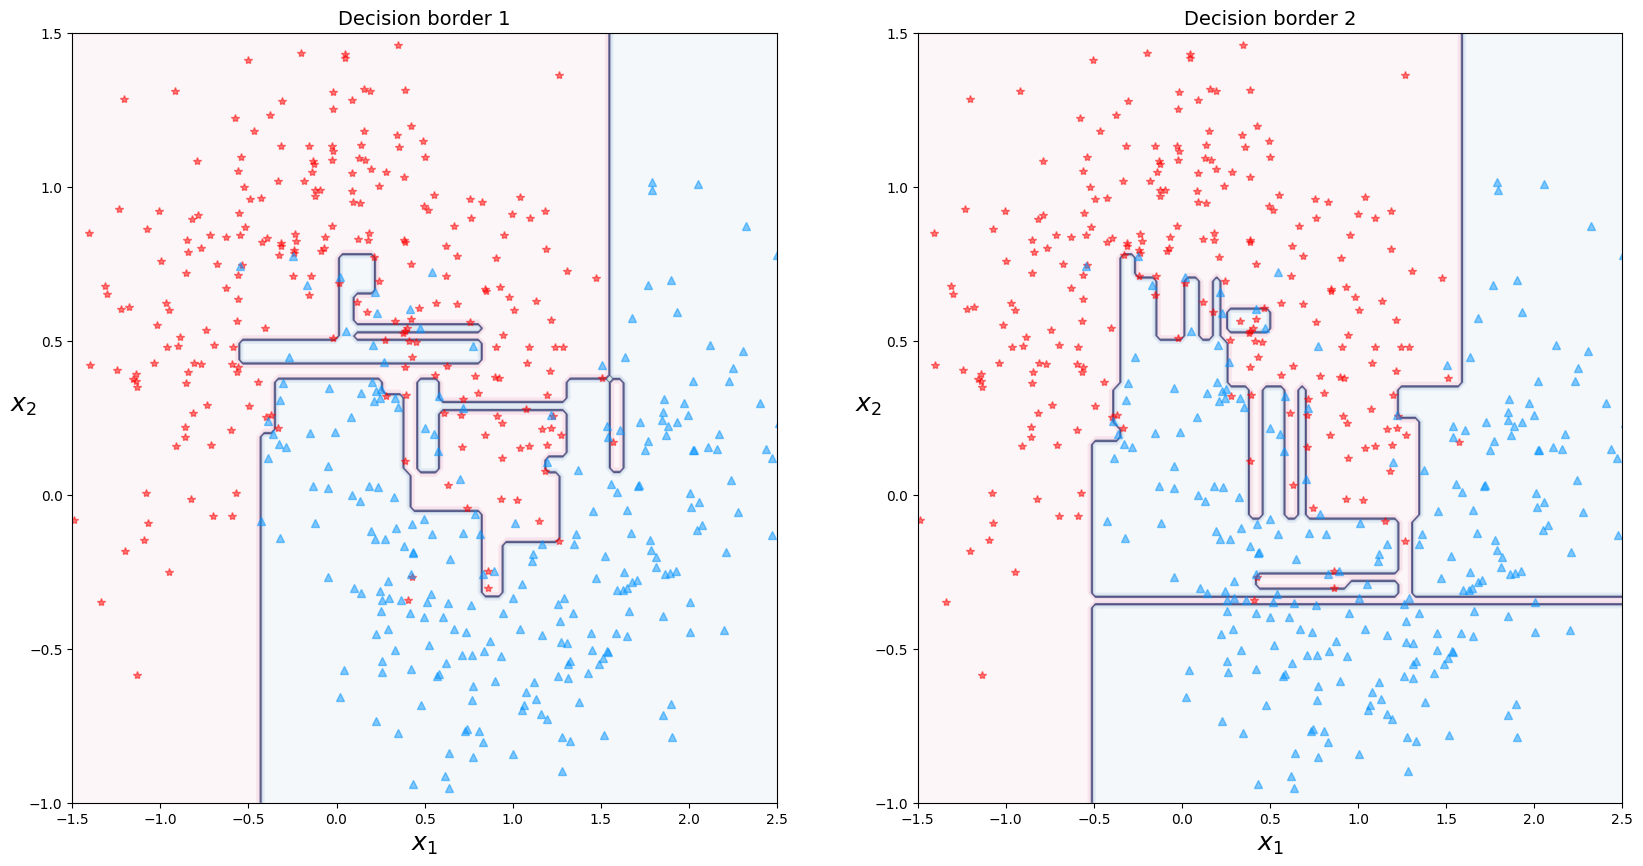

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)
clf1 = DecisionTreeClassifier(max_depth = 20,
                             random_state = 0)
clf1.fit(X_train1, y_train1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=77)
clf2 = DecisionTreeClassifier(max_depth = 20,
                             random_state = 0)
clf2.fit(X_train2, y_train2)

plt.figure(figsize=(20,10))
plt.subplot(121)

plot_decision_boundary(clf1, X, y)
plt.title("Decision border 1", fontsize=14)

plt.subplot(122)
plot_decision_boundary(clf2, X, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Рваные границы остались, но при другом делении на трейн и тест они стали другими. Дерево явно перебучается и плодит лишние разбиения, основываясь на малом числе объектов в листьях.

Такая сильная реакция на шум в данных указывает на то, что у модели высокий **variance**.

Можно ли это поправить?

Попробуем зайти с другой стороны. Попробуем взять дерево меньшей глубины. Глубина 1 даст нам всего одну разделяющую плоскость, для двумерного случая это явно маловато, так что возьмем глубину 2:

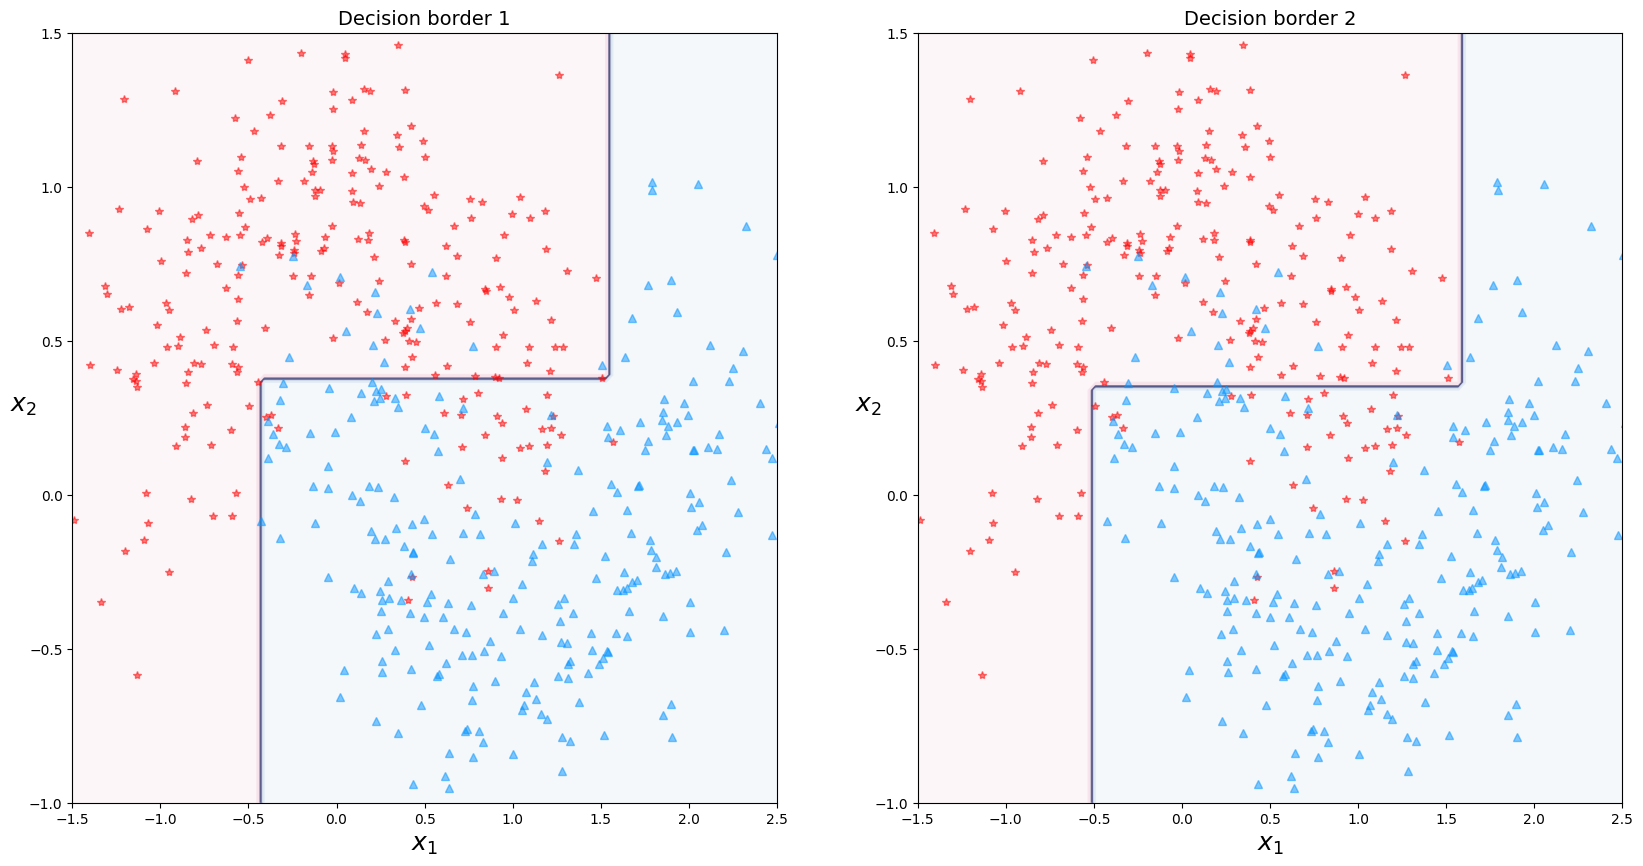

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)
clf1 = DecisionTreeClassifier(max_depth = 2,
                             random_state = 0)
clf1.fit(X_train1, y_train1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=77)
clf2 = DecisionTreeClassifier(max_depth = 2,
                             random_state = 0)
clf2.fit(X_train2, y_train2)

plt.figure(figsize=(20,10))
plt.subplot(121)

plot_decision_boundary(clf1, X, y)
plt.title("Decision border 1", fontsize=14)

plt.subplot(122)
plot_decision_boundary(clf2, X, y)
plt.title("Decision border 2", fontsize=14)
plt.show()

Вне зависимости от разделения выборки на трейн и тест деревья дают одинаковый результат! Однако, такого разделения явно маловато для нашего примера: слишком большое число объектов попадает в неправильный класс. Модель слошком простая и неспособна отловить внутреннюю сложность в данных $-$ у нее низкий variance, но высокий **bias**.

 Возможно, истину следует искать где-то посередине..

## Bias-variance tradeoff<a class="anchor" style="autocontent" id="Bias-variance tradeoff"/><br>



Ошибку модели можно разложить на три составляющие по формуле

$$ Model\_error = Bias^2 + Variance + Irreducible\_error $$

Не надо пугаться этой сложной формулы, каждую из частей мы сейчас охарактеризуем






### Irreducible error

Первая часть ошибки - $Irreducible~error$, из-за изначальной неопределенности в предсказываемой величине.

Болезнь может определяться мутацией в одном гене. Но у одного человека из-за огромного числа внешних условий, которые мы не можем учесть в модели, она разовьется полностью, у другого - лишь частично, а третий так и проживет, не узнав, что он был ею болен.

Более простой пример - нельзя предсказать, какой стороной приземлится монетка. Мы можем знать точные вероятности выпадения орла и решки для данной конкретной монеты. Но если они отличны от 0 и 1, то у нас всегда будет возможность ошибиться.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/harvi_coin.png" width='500px'>

### Bias

Когда мы хотим предсказывать какое-то явление, мы выбираем, какой моделью будем его описывать.

Что произойдет, если описываемая модель недооценивает сложность явления?

<img src="http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp_files/high-bias-plot.png" width="600px">

Как много данных мы бы не брали, как много моделей бы не запускали - наша модель в принципе не способна поймать паттерн в данных.

Конкретно в данном случае простая линейная модель $y = kx + b$ не может аппроксимировать параболу.



### Variance

А что будет, если мы возьмем слишком сложную модель?
Она будет сложнее реальной зависимости и/или размер выборки будет недостаточен, чтобы точно оценить все ее параметры.

<img src="http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp_files/varianceplot.png" width="600px">

В результате каждая из наших моделей будет выучивать не только истинный сигнал в данных, но и случайный шум. Модель будет переобучаться на обучающем наборе, заучивать его. А на тестовых образцах она будет выдавать неверные предсказания.

Проявляться это будет в том, что модель будет очень сильно зависеть от обучающей выборки - небольшое изменение в обучающей выборке будет менять много коэффициентов модели, и решение будет "рваным" - достаточно немного поменять признаки объекта, и предсказание меняется очень резко.

### Bias-variance tradeoff

При работе с реальными данными всегда приходится искать точку оптимума, приближенную к реальной модели данных. Полностью избавиться от ошибок, скорее всего, не получится, однако возможно найти точку, в которой и bias, и variance будут вносить наименьший вклад. На практике это означает попытку подобрать оптимальную сложность модели, что мы и делаем при подборе параметров.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/bias_vs_var.png" alt="Drawing" width= "600px;"/>


### Деревья и bias-variance tradeoff

Мы знаем, что малые колебания в данных вызывают у глубоких деревьев сильные колебания результата в местах зашумления данных. Однако некоторая часть объектов предсказывается правильно всегда или почти всегда.

Попробуем построить статистику: построим, например, 100 деревьев одной глубины на разных разбиениях выборки и посмотрим, насколько часто разные объекты получают правильное предсказание.

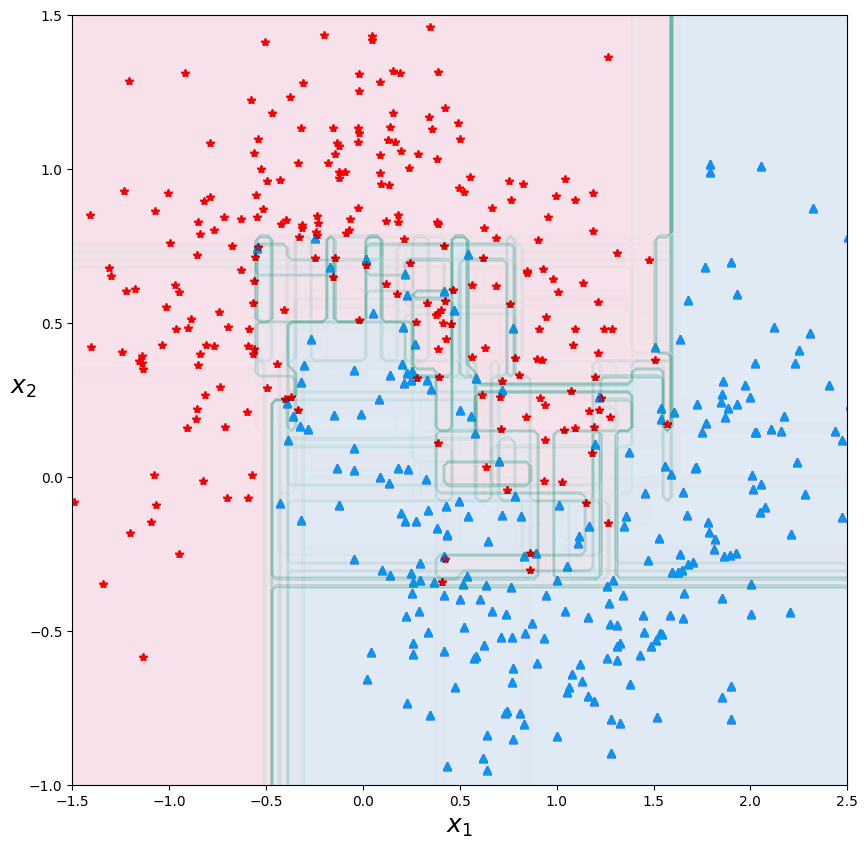

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    clf = DecisionTreeClassifier(max_depth = 20,
                                 random_state = 0)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X, y, alpha=0.02, contour=False)

plt.show()

Наложив границы 100 разных деревьев, мы видим, что "хорошие" области совпадают, а вот "плохие" все индивидуальны.

Таким образом, имея большое количество разных деревьев, мы могли бы оценить *поддержку* нашего предсказания, и выбрать только наиболее оцененные области.

Это приводит нас к идее **ансамблей**.



# Ансамбли<a class="anchor" style="autocontent" id="Ансамбли"/><br>

Немного отвлечемся от деревьев.

Пусть у нас есть сигнал, который мы получаем:

<font color=green size=30>1110110011</font>

Но при передаче с другого устройства в нем могут возникать ошибки.

<font color=green size=30>11</font><font color=red size=30>0</font><font color=green size=30>011</font><font color=red size=30>1</font><font color=green size=30>011</font>

Самое простое решение возникшей проблемы:

 1. Шум, который вносит ошибки, скорее всего не зависит от места в сигнале;
 2. Передадим 3 раза один и тот же сигнал;

<font color=green size=30>1</font><font color=red size=30>0</font><font color=green size=30>1011</font><font color=red size=30>1</font><font color=green size=30>011</font>

<font color=green size=30>1110</font><font color=red size=30>0</font><font color=green size=30>10011</font>

<font color=green size=30>11</font><font color=red size=30>0</font><font color=green size=30>0110</font><font color=red size=30>1</font> <font color=green size=30>11</font>



 3. Усредним, что получилось (в каждом случае возьмем наиболее часто встречающуюся цифру);

<font color=green size=30>1110110011</font>


 4. С большой долей вероятности итоговый сигнал восстановится;
 5. Чем больше копий сигналов передастся, тем выше вероятность, что сигнал восстановится полностью корректно.

Но всегда ли мы получим улучшение результата?

Нет.

Предположим, ошибки в сигнале распределены не случайно, а всегда происходят в одних и тех же позициях (например, на конце сигнала):

<font color=green size=30>11111111</font><font color=red size=30>00</font> - 80% точность

<font color=green size=30>11111111</font><font color=red size=30>00</font> - 80% точность

<font color=green size=30>1</font></font><font color=red size=30>0</font><font color=green size=30>111111</font><font color=red size=30>00</font> - 70% точность

Сколько бы раз мы ни посылали сигнал $-$ улучшения качества не получим.

А если сигнал получается сильно зашумленным, и в каждом из присланных сообщений ошибки составляют половину или больше от всего сообщения?

<font color=green size=30>1</font><font color=red size=30>000</font><font color=green size=30>1</font><font color=red size=30>0</font><font color=green size=30>1</font><font color=red size=30>0</font><font color=green size=30>1</font><font color=red size=30>0</font>

<font color=red size=30>00</font><font color=green size=30>111</font><font color=red size=30>0000</font><font color=green size=30>1</font>

<font color=green size=30>11</font><font color=red size=30>000000</font><font color=green size=30>11</font>

Получим неудовлетворительный результат!


Это приводит нас к двум важным наблюдениям:
1. Базовые модели в ансамбле не должны быть скореллированы
2. Качество всех моделей в ансамбле дожно быть как минимум выше 50%

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/ensemble_accuracy_plots.png" alt="Drawing" width= "900px;"/>

Очень хорошо!

Но в реальной жизни у нас есть только один датасет не самого большого размера.

Откуда же нам взять большое количество слабо скореллированных моделей?

На помощь нам придут два метода сэмплирования выборок.


# Бутстрэп<a class="anchor" style="autocontent" id="Бутстрэп"/><br>

Часто мы хотим получить какое-то представление о точности какой-либо нашей оценки - медианы выборки, качества модели, корреляции между двумя переменными и тд. И мы не знаем, как распределена характеристика, которую мы оцениваем.

Есть много подходов к тому, как получить такую оценку и один из них - бутстрэп.


Что мы делаем:

1. Делаем из нашего исходного датасета N выборок такого же размера с повторениями.

2. Для каждой полученной выборки (обычно их называют **псевдовыборками**) считаем характеристику, для которой хотим получить оценку.

3. В результате такой процедуры получаем N значений характеристики. Таким образом у нас в руках есть примерное распределение нашей характеристики.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/bootstrap_img.png" alt="Drawing" width= "800px;"/>

[Источник](https://mlcourse.ai/articles/topic5-part1-bagging/)


Таким образом из одного датасета мы можем получить много похожих друг на друга датасетов. И там где другие модели покажут похожий (и потому скоррелированный) результат, наши деревья решений, чувствительные к вариации данных, будут ошибаться по-разному.



### Чем ещё знаменит бутстрэп?

В классической биоинформатике bootstrap чаще всего используется в филогенетике для того чтобы оценить поддержку каждой из ветвей реконструированного по выравниванию дерева. В этом случае сэмплируются с повторениями колонки исходного выравнивания, по полученному множеству деревьев строится консенсусное дерево, после чего для каждой из его ветвей оценивается процент деревьев в выборке, в которых эта ветвь встретилась.

https://doi.org/10.1093/bib/bbq079
<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/phylo_bootstrap.png" alt="Drawing" width= "800px;"/>

## Bagging: Bootstrap aggregation<a class="anchor" style="autocontent" id="Bagging: Bootstrap-aggregation"/><br>



<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/bagging.png" alt="Drawing" width= "600px;"/>

Полученные при помощи бутстрэпа псевдовыборки -- как раз то, что нам было нужно для обучения ансамбля моделей.

1. При помощи бутстрэпа генерируем из нашей тренировочной выборки N выборок того же размера с повторениями
2. Обучаем на каждой выборке свою отдельную модель. Для того, чтобы в результате полученные модели были слабо скоррелированы, используем алгоритм, чувствительный к изменениям в данных (например, деревья решений) $-$ таким образом получаем N слабо зависимых моделей
3. Для получения предсказания прогоняем объект через все модели, затем усредняем результат.

## Метод случайных подпространств (RSM, random subspace method)<a class="anchor" style="autocontent" id="Метод-случайных-подпространств-(RSM,-random-subspace-method)"/><br>

Второй вариант получения псевдовыборок — мы можем сэмплировать не объекты, а признаки.  При этом бесполезно иметь в выборке два одинаковых признака, потому мы делаем выборки меньшего размера, чем исходное число признаков и без повторений.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/rsm.png" alt="Drawing" width= "800px;"/>


## Комбинация RSM и Bagging<a class="anchor" style="autocontent" id="Комбинация-RSM-и-Bagging"/><br>


Можно объединить оба подхода: применять bootstrap к объектам (в результате получается выборка одного размера, но часть объектов повторяются, а каких-то объектов не будет), и, кроме этого, выбрасывать часть признаков. Зачем это нужно? В этом случае мы получим еще более сильно отличающиеся друг от друга случайные выборки.

[sklearn.ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) и [sklearn.ensemble.BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) вопреки названию поддерживают оба способа.





## Случайный лес<a class="anchor" style="autocontent" id="Случайный-лес"/><br>

Ещё более успешной моделью является **случайный лес**, в котором RSM и Bagging реализованы над деревом решений, причем RSM выполняется *на уровне каждого узла* независимо.

Случайный лес не просто работает лучше случайно взятого дерева или другой модели, но еще и чрезвычайно устойчив к шуму, что делает его отличной моделью для работы с биологическими данными.

### Случайный лес и переобучение<a class="anchor" style="autocontent" id="Случайный лес и переобучение"/><br>

Даже такая сильная модель как случайный лес может быть подвержена переобучению. Однако он куда более устойчив чем, например, единичное дерево.

Вернемся к нашему примеру с лунами:

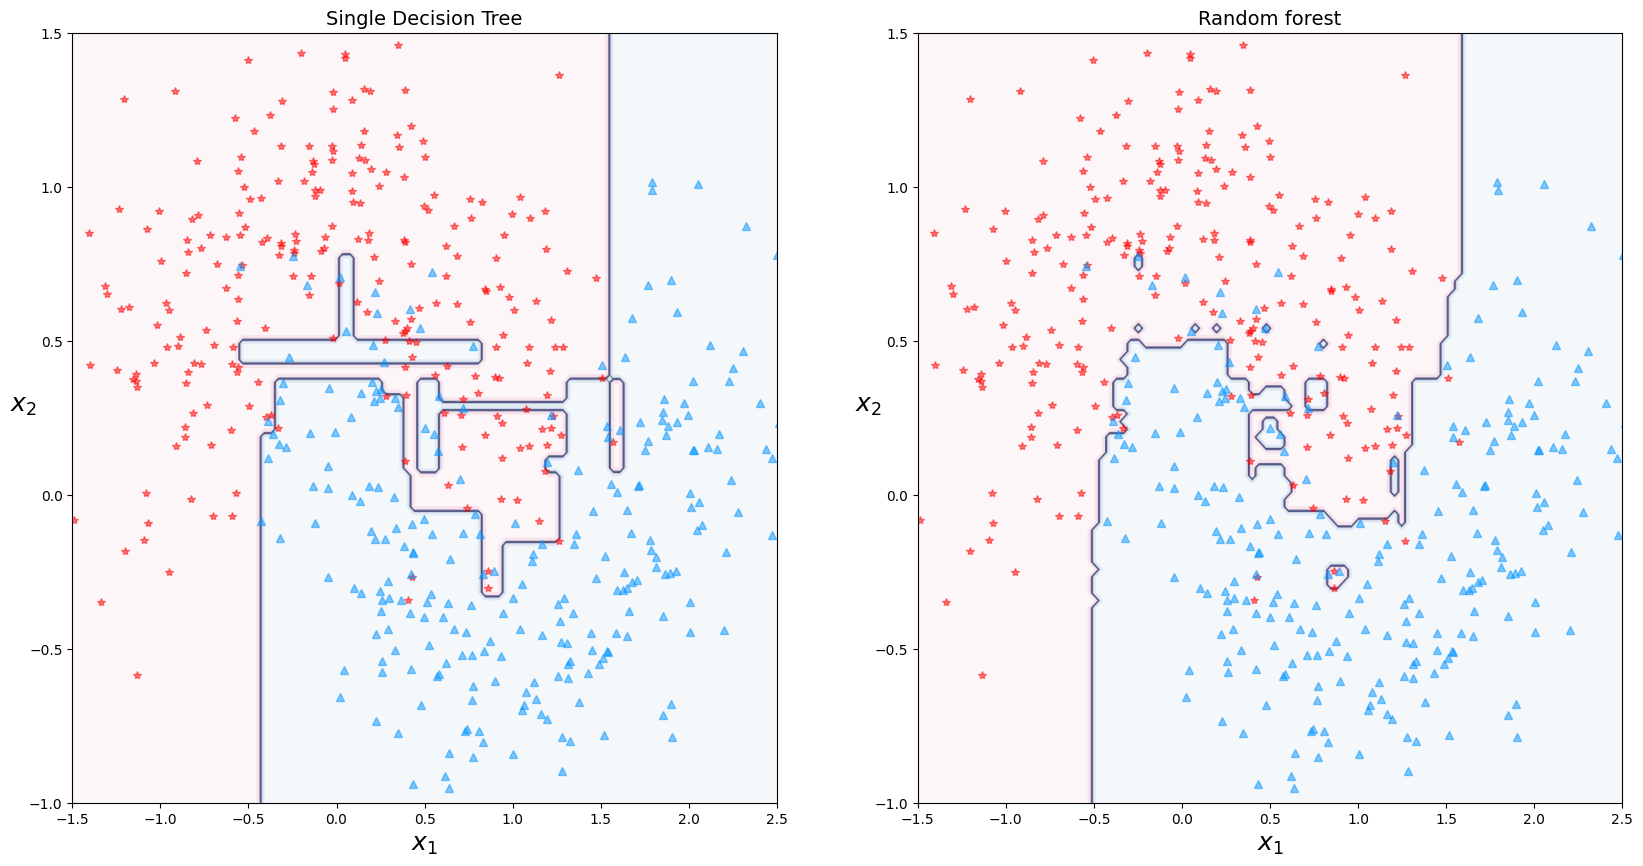

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.figure(figsize=(20,10))
plt.subplot(121)

clf = DecisionTreeClassifier(max_depth = 10,
                             random_state = 0)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X, y)
plt.title("Single Decision Tree", fontsize=14)


plt.subplot(122)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
plot_decision_boundary(rf, X, y)
plt.title("Random forest", fontsize=14)
plt.show()

Безусловно, стало лучше, чем в случае с деревом, однако рваные области, пузырьки и карманы никуда не делись. Попробуем ввести ограничение на число элементов в листе:

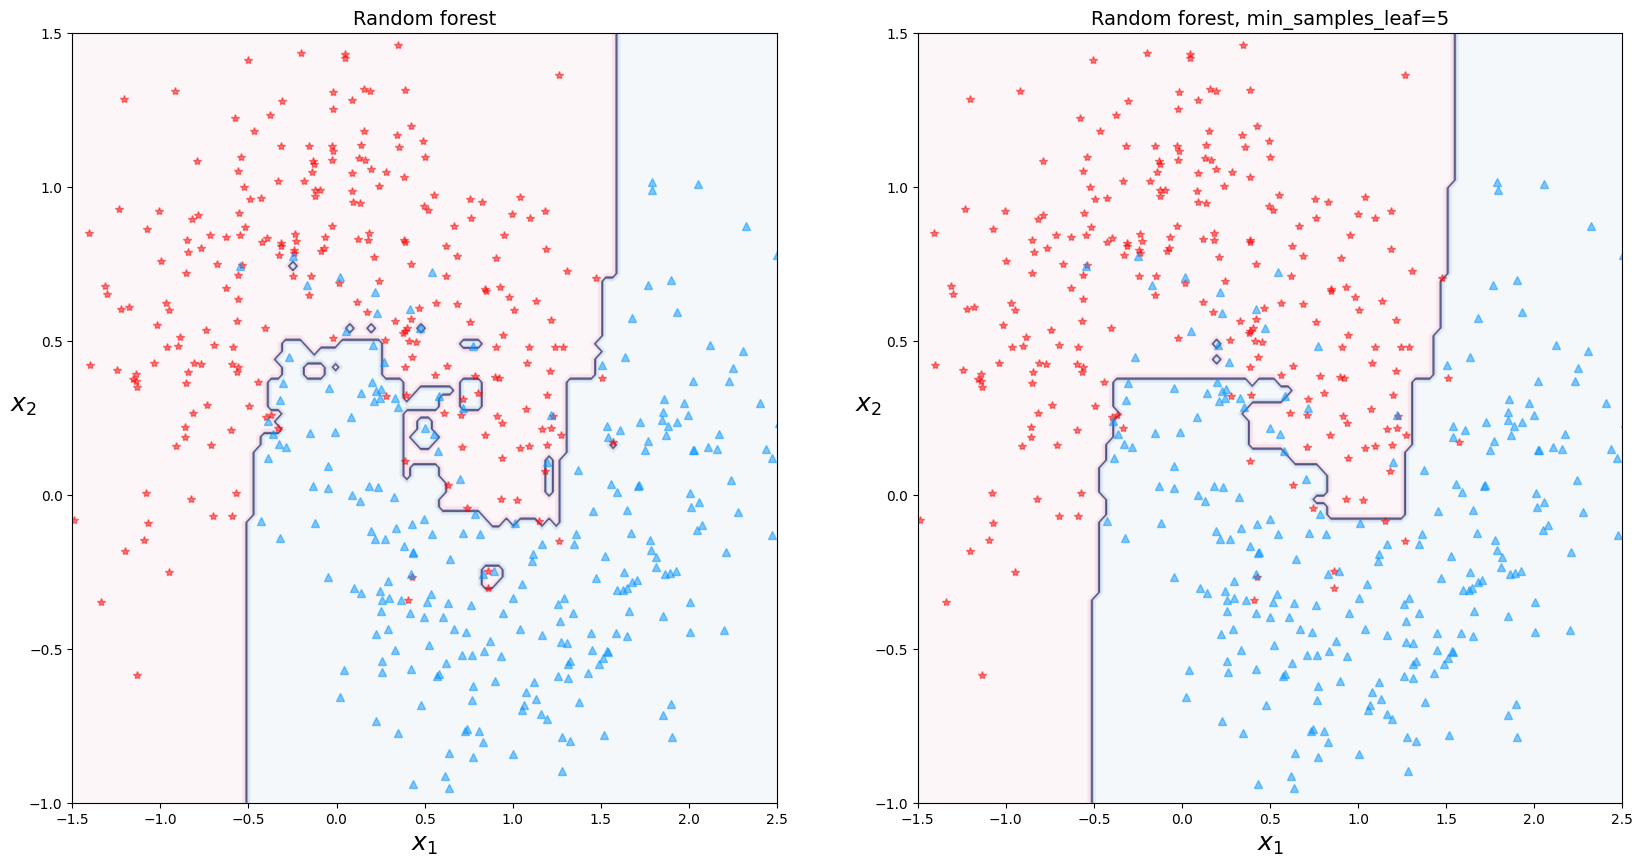

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
rf1 = RandomForestClassifier(n_estimators=1000)
rf1.fit(X_train, y_train)
plot_decision_boundary(rf1, X, y)
plt.title("Random forest", fontsize=14)


plt.subplot(122)
rf2 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=5)
rf2.fit(X_train, y_train)
plot_decision_boundary(rf2, X, y)
plt.title("Random forest, min_samples_leaf=5", fontsize=14)
plt.show()

Картина почти идеальная.
Нетрудно догадаться, что у более "переобученного" леса слева качество на трейне будет выше, а  на тесте ниже чем у леса справа:

In [ ]:
from sklearn.metrics import average_precision_score

q = average_precision_score(y_true=y_train, y_score=rf1.predict(X_train))
print(f"RF1 Train: {q:.02}")
q = average_precision_score(y_true=y_train, y_score=rf2.predict(X_train))
print(f"RF2 Train: {q:.02}")

q = average_precision_score(y_true=y_test, y_score=rf1.predict(X_test))
print(f"RF1 Test: {q:.02}")
q = average_precision_score(y_true=y_test, y_score=rf2.predict(X_test))
print(f"RF2 Test: {q:.02}")

RF1 Train: 1.0
RF2 Train: 0.91
RF1 Test: 0.87
RF2 Test: 0.89


### Зависимость качества случайного леса от числа деревьев<a class="anchor" style="autocontent" id="Зависимость-качества-случайного-леса-от-числа-деревьев"/><br>
Для случайного леса верно следующее: когда мы берем множество базовых классификаторов (в данном случае деревьев) и усредняем их, то результат этих усреднений стремится к идеальному дереву решений. Причем построенному на идеальных, а не на исходных признаках.

В какой-то момент при увеличении числа деревьев качество леса перестанет изменяться (при этом переобучение не наступит).


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/dtrees/num_trees.png" alt="Drawing" width= "700px;"/>

[Источник](https://www.researchgate.net/publication/273701672_Distinguishing_between_productive_and_abortive_promoters_using_a_random_forest_classifier_in_Mycoplasma_pneumoniae)

Видим, что действительно, с какого-то момента качество модели почти не изменяется, увеличение числа базовых эстиматоров как минимум не ухудшает ее качество.

### Зависимость качества случайного леса от глубины дерева<a class="anchor" style="autocontent" id="Зависимость-качества-случайного-леса-от-глубины-дерева"/><br>

Мы уже обсуждали, что чем больше глубина дерева, тем большая нескорелированность базовых моделей будет получаться. По идее, в случайном лесе важно использовать именно глубокие деревья, причем, в большинстве случаев их глубину не надо ограничивать (или ограничивать большими значениями порядка 10-12). Проверим это.

Кроме этого, будем добавлять кроме случайного леса с заданной глубиной еще одиночное дерево такой же глубины

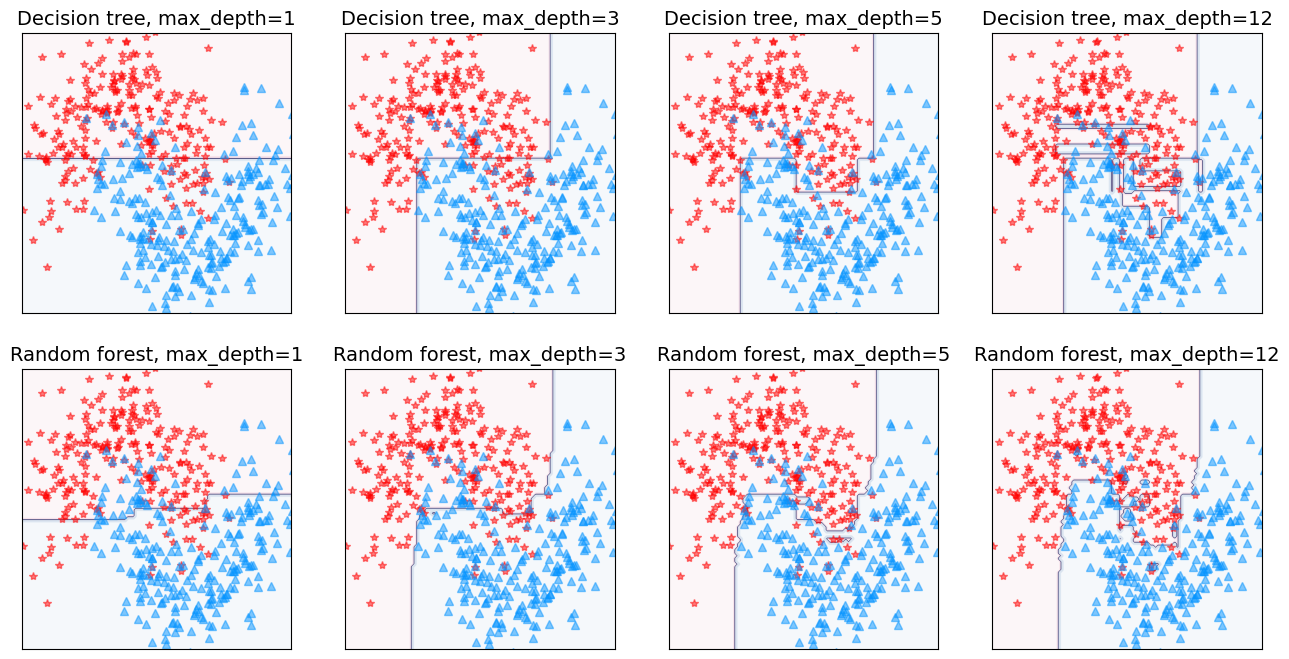

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(241)
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X_train, y_train)
plot_decision_boundary(dt1, X, y)
plt.xticks([], [])
plt.yticks([], [])

plt.title("Decision tree, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(242)
dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(X_train, y_train)
plot_decision_boundary(dt3, X, y)
plt.title("Decision tree, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(243)
dt5 = DecisionTreeClassifier(max_depth=5)
dt5.fit(X_train, y_train)
plot_decision_boundary(dt5, X, y)
plt.title("Decision tree, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(244)
dt12 = DecisionTreeClassifier(max_depth=12)
dt12.fit(X_train, y_train)
plot_decision_boundary(dt12, X, y)
plt.title("Decision tree, max_depth=12", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(245)
rf1 = RandomForestClassifier(max_depth=1, n_estimators=500, n_jobs=-1)
rf1.fit(X_train, y_train)
plot_decision_boundary(rf1, X, y)
plt.title("Random forest, max_depth=1", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(246)
rf3 = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1)
rf3.fit(X_train, y_train)
plot_decision_boundary(rf3, X, y)
plt.title("Random forest, max_depth=3", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(247)
rf5 = RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1)
rf5.fit(X_train, y_train)
plot_decision_boundary(rf5, X, y)
plt.title("Random forest, max_depth=5", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(248)
rf12 = RandomForestClassifier(max_depth=12, n_estimators=500, n_jobs=-1)
rf12.fit(X_train, y_train)
plot_decision_boundary(rf12, X, y)
plt.title("Random forest, max_depth=12", fontsize=14)
plt.subplots_adjust()
plt.xlabel("")
plt.ylabel("")
plt.xticks([], [])
plt.yticks([], []);


Качество случайного леса с малой глубиной дерева не отличается от качества одиночного дерева той же глубины. Опять же, деревья малой глубины слабо отличаются друг от друга, потому усреднение их предсказаний не дает почти никакого выигрыша.

Стоит все же отметить, что в случае малых выборок, назначительные ограничения на глубину дерева могут дать выигрыш.
